<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_8)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n20.csv',
 'data_add_delta_-0.8_n30.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.252348,31.504218,74.440878,0.017216,149.214659,149.189375,0.025285
1,0.0,1.0,66.284302,54.806051,84.058942,0.045870,215.195164,215.144062,0.051101
2,0.0,2.0,63.469968,74.488289,64.539510,-0.040218,212.457550,212.491066,-0.033516
3,0.0,3.0,39.201596,89.480085,50.916529,0.003595,189.601806,189.589419,0.012387
4,0.0,4.0,61.972473,68.876183,51.615252,0.023562,192.487469,192.455927,0.031542
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,98.931356,73.296962,48.934728,0.025590,231.188637,231.170055,0.018581
19996,999.0,16.0,23.066222,86.242114,41.373121,-0.020637,160.660820,160.670264,-0.009445
19997,999.0,17.0,63.307390,39.606743,41.442337,-0.054443,154.302027,154.374175,-0.072147
19998,999.0,18.0,30.013594,77.097827,21.114376,-0.023797,138.202000,138.236569,-0.034569


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.252348,31.504218,74.440878,0.017216,149.214659,149.189375,0.025285
1,0.0,1.0,66.284302,54.806051,84.058942,0.045870,215.195164,215.144062,0.051101
2,0.0,2.0,63.469968,74.488289,64.539510,-0.040218,212.457550,212.491066,-0.033516
3,0.0,3.0,39.201596,89.480085,50.916529,0.003595,189.601806,189.589419,0.012387
4,0.0,4.0,61.972473,68.876183,51.615252,0.023562,192.487469,192.455927,0.031542
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,98.931356,73.296962,48.934728,0.025590,231.188637,231.170055,0.018581
19996,999.0,16.0,23.066222,86.242114,41.373121,-0.020637,160.660820,160.670264,-0.009445
19997,999.0,17.0,63.307390,39.606743,41.442337,-0.054443,154.302027,154.374175,-0.072147
19998,999.0,18.0,30.013594,77.097827,21.114376,-0.023797,138.202000,138.236569,-0.034569


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.252348  31.504218  74.440878  ...  149.214659  149.189375  0.025285
      1.0    66.284302  54.806051  84.058942  ...  215.195164  215.144062  0.051101
      2.0    63.469968  74.488289  64.539510  ...  212.457550  212.491066 -0.033516
      3.0    39.201596  89.480085  50.916529  ...  189.601806  189.589419  0.012387
      4.0    61.972473  68.876183  51.615252  ...  192.487469  192.455927  0.031542
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   98.931356  73.296962  48.934728  ...  231.188637  231.170055  0.018581
      16.0   23.066222  86.242114  41.373121  ...  160.660820  160.670264 -0.009445
      17.0   63.307390  39.606743  41.442337  ...  154.302027  154.374175 -0.072147
      18.0   30.013594  77.097827  21.114376  ...  138.202000  138.236569 -0.034569
      19.0   76.105205  34.828412  39.865643  ...  160.956138  160.823407  0.132731

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.252348  31.504218  74.440878  ...  149.214659  149.189375  0.025285
      1.0    66.284302  54.806051  84.058942  ...  215.195164  215.144062  0.051101
      2.0    63.469968  74.488289  64.539510  ...  212.457550  212.491066 -0.033516
      3.0    39.201596  89.480085  50.916529  ...  189.601806  189.589419  0.012387
      4.0    61.972473  68.876183  51.615252  ...  192.487469  192.455927  0.031542
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   98.931356  73.296962  48.934728  ...  231.188637  231.170055  0.018581
      16.0   23.066222  86.242114  41.373121  ...  160.660820  160.670264 -0.009445
      17.0   63.307390  39.606743  41.442337  ...  154.302027  154.374175 -0.072147
      18.0   30.013594  77.097827  21.114376  ...  138.202000  138.236569 -0.034569
      19.0   76.105205  34.828412  39.865643  ...  160.956138  160.823407  0.132731

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,33.252348,31.504218,74.440878,0.017216,149.214659,149.189375,0.025285
1,0.0,1.0,66.284302,54.806051,84.058942,0.045870,215.195164,215.144062,0.051101
2,0.0,2.0,63.469968,74.488289,64.539510,-0.040218,212.457550,212.491066,-0.033516
3,0.0,3.0,39.201596,89.480085,50.916529,0.003595,189.601806,189.589419,0.012387
4,0.0,4.0,61.972473,68.876183,51.615252,0.023562,192.487469,192.455927,0.031542
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,98.931356,73.296962,48.934728,0.025590,231.188637,231.170055,0.018581
19996,999.0,16.0,23.066222,86.242114,41.373121,-0.020637,160.660820,160.670264,-0.009445
19997,999.0,17.0,63.307390,39.606743,41.442337,-0.054443,154.302027,154.374175,-0.072147
19998,999.0,18.0,30.013594,77.097827,21.114376,-0.023797,138.202000,138.236569,-0.034569


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    33.252348  31.504218  74.440878  ...  149.214659  149.189375  0.025285
      1.0    66.284302  54.806051  84.058942  ...  215.195164  215.144062  0.051101
      2.0    63.469968  74.488289  64.539510  ...  212.457550  212.491066 -0.033516
      3.0    39.201596  89.480085  50.916529  ...  189.601806  189.589419  0.012387
      4.0    61.972473  68.876183  51.615252  ...  192.487469  192.455927  0.031542
...                ...        ...        ...  ...         ...         ...       ...
999.0 15.0   98.931356  73.296962  48.934728  ...  231.188637  231.170055  0.018581
      16.0   23.066222  86.242114  41.373121  ...  160.660820  160.670264 -0.009445
      17.0   63.307390  39.606743  41.442337  ...  154.302027  154.374175 -0.072147
      18.0   30.013594  77.097827  21.114376  ...  138.202000  138.236569 -0.034569
      19.0   76.105205  34.828412  39.865643  ...  160.956138  160.823407  0.132731

[20000 rows x 7 columns]

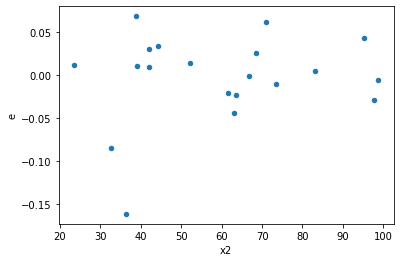

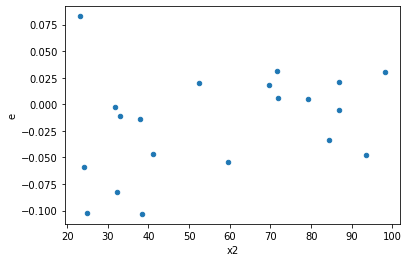

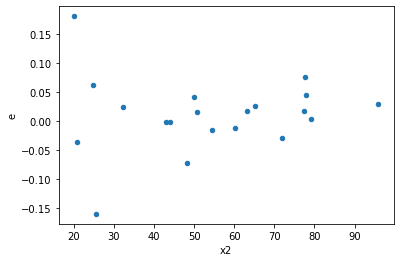

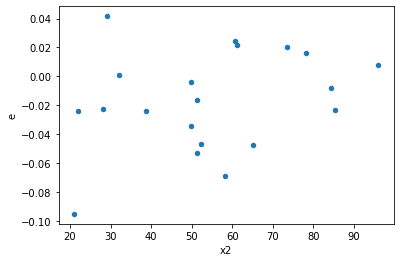

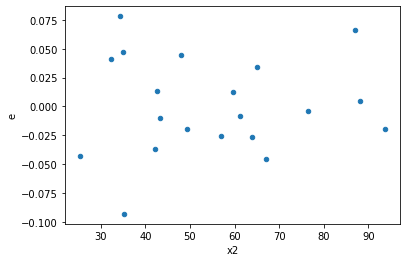

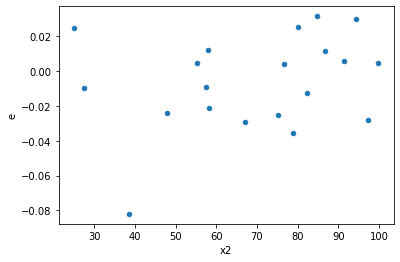

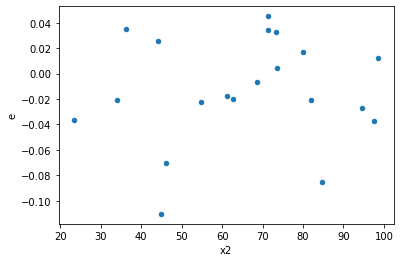

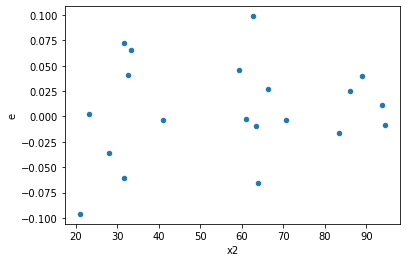

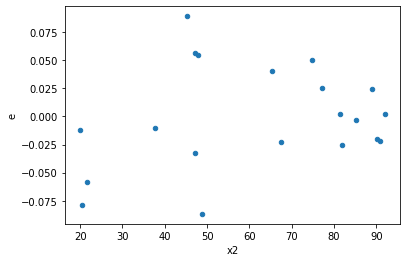

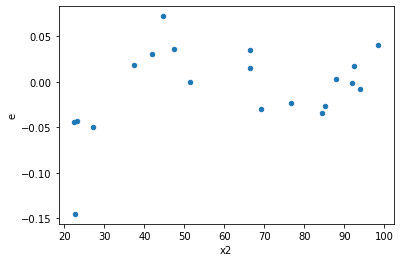

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
29.0,5.0,5.0,0.0022241988431973662,0.00205310052883182,0.0005560497107993416,0.000513275132207955,1.0833365497513647,0.932145692700372,0.533927153649814,Reject005=1 : Homoscedasticity
38.0,5.0,5.0,0.013107960389441656,0.007995935828564704,0.003276990097360414,0.001998983957141176,1.63932786236412,0.6007329171697475,0.6996335414151262,Reject005=1 : Homoscedasticity
45.0,5.0,5.0,0.0032527342259709774,0.0018962923100012273,0.0008131835564927443,0.00047407307750030683,1.715312670317622,0.5681316784116426,0.7159341607941787,Reject005=1 : Homoscedasticity
63.0,5.0,5.0,0.0025151187151663513,0.0008430141871370651,0.0006287796787915878,0.00021075354678426627,2.9834832598818646,0.25546070815712874,0.8722696459214356,Reject005=1 : Homoscedasticity
64.0,5.0,5.0,0.004635649386213325,0.003155972046976859,0.0011589123465533312,0.0007889930117442147,1.4688499508903652,0.6833870929249759,0.658306453537512,Reject005=1 : Homoscedasticity
70.0,5.0,5.0,0.007789801094067853,0.0029430357676929197,0.0019474502735169633,0.0007357589419232299,2.6468591308267957,0.3090845858797424,0.8454577070601288,Reject005=1 : Homoscedasticity
73.0,5.0,5.0,0.00304759748603948,0.00037933556240071304,0.00076189937150987,9.483389060017826e-05,8.03404106578369,0.039153698492543576,0.9804231507537282,Reject005=0 : Heteroscedasticity
80.0,5.0,5.0,0.005110158973564883,0.0050957135809992175,0.0012775397433912208,0.0012739283952498044,1.0028348125019289,0.9975971446462573,0.5012014276768714,Reject005=1 : Homoscedasticity
85.0,5.0,5.0,0.007472223573318937,0.0008914602579093318,0.0018680558933297342,0.00022286506447733294,8.382004140984284,0.03579328466281484,0.9821033576685926,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,0.0033471543257714504,0.004621615341824214,0.0008367885814428626,0.0011554038354560535,0.7242390545748628,0.7319500546565424,Reject005=1 : Homoscedasticity
1.0,5.0,5.0,0.001643335306300593,0.010109543739725346,0.00041083382657514827,0.0025273859349313364,0.16255286574834474,0.06786031138733485,Reject005=1 : Homoscedasticity
2.0,5.0,5.0,0.0013766918419168734,0.03274323321048486,0.00034417296047921836,0.008185808302621216,0.04204507945403621,0.003400654720448171,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,0.0003542027476122434,0.024217526362378637,8.855068690306085e-05,0.006054381590594659,0.014625884671792455,0.0002668877219391771,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,0.0016882184730046233,0.0036894834854891553,0.00042205461825115583,0.0009223708713722888,0.45757583131742835,0.41105533388306925,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,0.0011831324046689819,0.01648352771682054,0.00029578310116724546,0.004120881929205135,0.07177665030172271,0.011717378954488567,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,0.002356873228685744,0.018125504998400974,0.000589218307171436,0.004531376249600243,0.13003076211634748,0.04292024000843741,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,0.001558064524421173,0.018461739287904195,0.00038951613110529325,0.004615434821976049,0.08439424369089586,0.01685131198721558,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,0.004481269738480137,0.024597151952286442,0.0011203174346200342,0.0061492879880716105,0.1821865290409599,0.08508491370221129,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      702
Reject005=0 : Heteroscedasticity    298
Name: Result_test, dtype: int64